# Friend-to-friendネットワークにおける効率的な分散ルーティング

#### 非線形物理学講座　理論神経科学・非平衡系数理グループ
#### B4髙橋彰

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from math import log
import random, logging, sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from utils.gen import kleinberg_ring
from utils.search import greedy_path, average_greedy_path_length, RoutingError
from utils.misc import shuffle_position_ring, dist_ring, labels_from_attr

logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, stream=sys.stderr)

# 1. 研究の動機


# 2. 先行研究の紹介

## 2.1 Kleinberg(2000) - Navigable small-world network model 
- Milgramの実験(1961)では各ノードがネットワーク全体の構造を知らずとも少ないホップ数でメッセージをターゲットまで届けることができた
- Watts-Strogatz(1998)のモデルはスモール・ワールド性が反映されているが、スモール・ワールドのおけるルーティングまでは考慮されていない
- 分散ルーティング=各ノードがローカルな情報のみを利用して次にメッセージを渡すべきノードを決定するルーティング
- Kleinberg(2000)は分散ルーティング可能なスモール・ワールドネットワークのモデルを提唱
- $P(u,v) \propto d(u,v)^{-r}$

## 2.1 Kleinberg(2000) - Navigable small-world network model 
### 3つの定理
- Th.1
- Th.2
- Th.3

## 2.1 Kleinberg(2000) - Navigable small-world network model 
### 1次元の場合

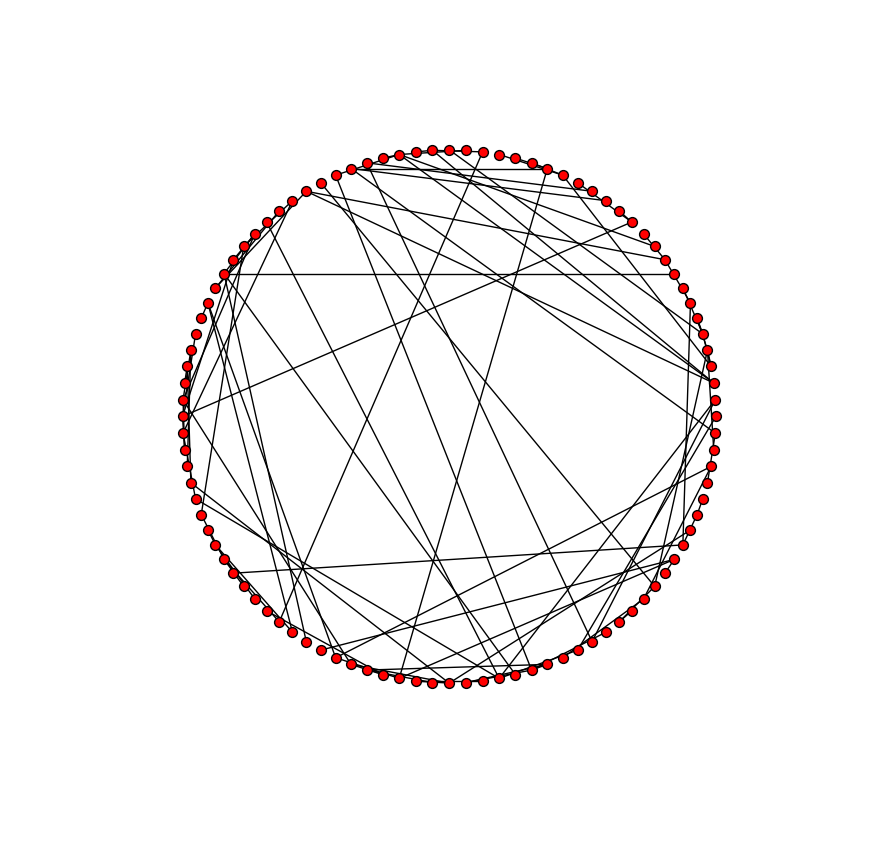

In [4]:
plt.rcParams['figure.figsize'] = (8,8)
G = kleinberg_ring(100, p=0, q=1, r=1)
nx.draw_circular(G, with_labels=False, node_size=50, font_size=8)

<img  src="data/YQPK7LUC9SRGU7RKDEPYACEW23YR5SRU.png"/>

## 2.1 Kleinberg(2000) - Navigable small-world network model 
### 2次元の場合

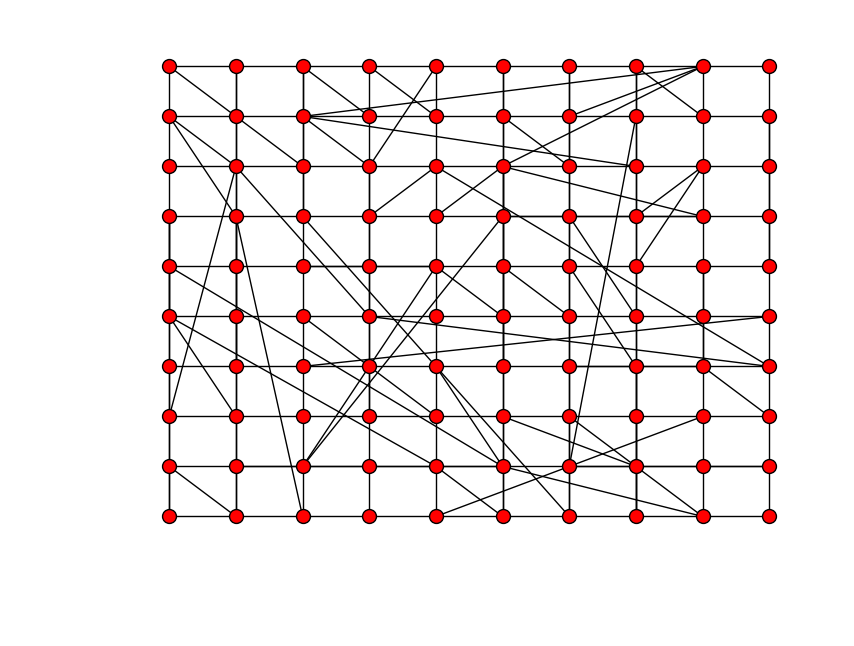

In [6]:
plt.rcParams['figure.figsize'] = (8,6)
G = nx.navigable_small_world_graph(10, p=1, q=1, r=2, dim=2)
G = G.to_undirected()
#nx.draw_networkx(G, pos=dict(zip(G,G)), node_size=100, font_size=8)
nx.draw(G, pos=dict(zip(G,G)), node_size=100, node_color='r')

<img  src="data/EVDBM00VC0J9VQP5IBTR2R06R3SQJQD1.png"/>

## 2.2 Sandberg(2005) - Distributed routing in small-world networks
### Idea
- スモール・ワールドネットワーク上でのルーティング→P2Pオーバーレイネットワーク上でのルーティング
- F2F(Friend-to-friend): セキュリティ、プライバシー保護のため、各ノードは現実世界で信用のおけるノードとのみ通信。P2Pの一形態。
- Kleinberg(2000)では各ノードが自分の格子上での位置を知っていることが前提となっている
    - コンピュータのオーバーレイネットワークではこの前提が成り立たない。
    - 各ノードに格子上の位置を知らせる必要がある

## 2.2 Sandberg(2005) - Distributed routing in small-world networks
### Node switching
- Metropolis-Hastings法を用いて、Kleinbergモデルへの最適な写像をサンプリング

# 3. 問題設定
